# Ancient Roman and Greek Sites in Turkey

In this notebook, we will explore the use of ML to analyze a dataset of ancient Greek and Roman sites in Turkey and to examine a possible future integration of ML in upcoming archeological essays. 

By utilizing the K-Nearest Neighbors algorithm, we will train a model to predict the types of sites that can be found in various locations across Turkey based on latitude and longitude data. This analysis can provide valuable insights into the distribution of ancient sites and assist archaeologists in their research and excavations.

Dataset downloaded from: https://www.kaggle.com/datasets/ocaktan/map-of-the-ancient-greek-and-roman-sites-in-turkey

### Read Dataset

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path_sites = os.path.join("res","AncientSitesinTurkey.csv")
df = pd.read_csv(path_sites)

In [3]:
df.head()

,Unnamed: 0,Name,Type,Link,Latitude,Longitude,ImageUrl,Description,LatDec,LongDec
0,0,Abydos (Hellespont),Greek,https://en.wikipedia.org//wiki/Abydos_(Hellesp...,40°11′43″N,26°24′18″E,https://upload.wikimedia.org/wikipedia/commons...,"Abydos (Ancient Greek: Ἄβυδος, Latin: Abydus) ...",40.195278,26.405000
1,1,Acharaca,Greek,https://en.wikipedia.org//wiki/Acharaca,37°54′N,28°06′E,https://upload.wikimedia.org/wikipedia/commons...,Acharaca (Ancient Greek: Ἀχάρακα) was a villag...,37.900000,28.100000
2,2,Achilleion (Troad),Greek,https://en.wikipedia.org//wiki/Achilleion_(Troad),39°54′54″N,26°9′9″E,https://upload.wikimedia.org/wikipedia/commons...,"Achilleion (Ancient Greek: Ἀχίλλειον, romanize...",39.915000,26.152500
3,3,Acrassus,Greek,https://en.wikipedia.org//wiki/Acrassus,NaN,NaN,NaN,Acrassus or Akrassos (Ancient Greek: Ἄκρασος) ...,NaN,NaN
4,4,Adada (Pisidia),Greek,https://en.wikipedia.org//wiki/Adada_(Pisidia),37°34′31″N,30°58′59″E,https://upload.wikimedia.org/wikipedia/commons...,Adada is an ancient city and archaeological si...,37.575278,30.983056


### Prepare data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   375 non-null    int64  
 1   Name         375 non-null    object 
 2   Type         375 non-null    object 
 3   Link         375 non-null    object 
 4   Latitude     332 non-null    object 
 5   Longitude    332 non-null    object 
 6   ImageUrl     312 non-null    object 
 7   Description  375 non-null    object 
 8   LatDec       332 non-null    float64
 9   LongDec      332 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 29.4+ KB


In [5]:
df.dropna(subset=['LatDec', 'LongDec', 'Type'], inplace=True)

In [6]:
df_sites = df[['Type', 'LatDec','LongDec']]

In [7]:
df_sites.head()

,Type,LatDec,LongDec
0,Greek,40.195278,26.405000
1,Greek,37.900000,28.100000
2,Greek,39.915000,26.152500
4,Greek,37.575278,30.983056
5,Greek/Roman,37.763889,38.277778


### Data representation

#### Barplot

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
grouped = df.groupby('Type').size()
grouped = grouped.sort_values(ascending=False)

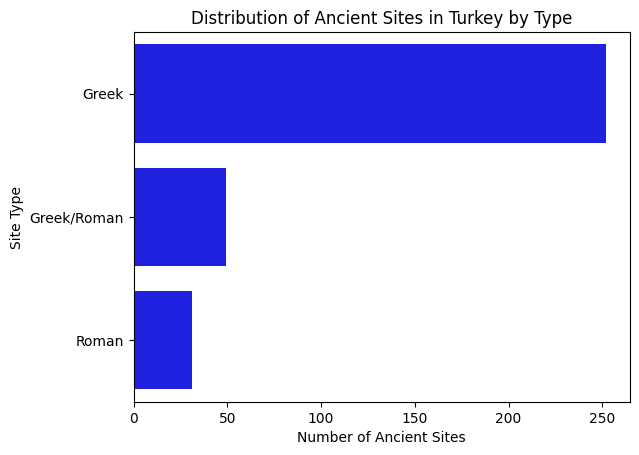

In [10]:
sns.barplot(x=grouped.values, y=grouped.index, color='blue')
plt.xlabel('Number of Ancient Sites')
plt.ylabel('Site Type')
plt.title('Distribution of Ancient Sites in Turkey by Type')
plt.show()

### Cluster maps

Reference used for the code in this section: https://realpython.com/python-folium-web-maps-from-data/

#### General map cluster

In [11]:
import folium
from folium.plugins import MarkerCluster, HeatMap

In [12]:
m = folium.Map(location=[38.9637, 35.2433], zoom_start=6, titles='Distribution of ancient sites')

In [13]:
for i, row in df_sites.iterrows():
    folium.Marker(location=[row['LatDec'], row['LongDec']],
                  popup=row['Type'],
                  icon=folium.Icon(color='gray')).add_to(m)

In [ ]:
m

#### Cluster map by site type

In [ ]:
map_2 = folium.Map(location=[38.9637, 35.2433], zoom_start=6, titles='Distribution of ancient sites')

In [ ]:
marker_cluster = MarkerCluster().add_to(map_2)

In [17]:
civilization_colors = {
    'Greek': 'blue',
    'Roman': 'red',
    'Greek/Roman': 'green'
}

In [18]:
for index, row in df_sites.iterrows():
    color = civilization_colors.get(row['Type'], 'gray')
    folium.Marker(location=[row['LatDec'], row['LongDec']],
                  popup=row['Type'],
                  icon=folium.Icon(color=color),
                  ).add_to(marker_cluster)

In [19]:
map_2

In [20]:
map_3 = folium.Map(location=[38.9637, 35.2433], zoom_start=6, titles='Distribution of ancient sites')

In [21]:
for index, row in df_sites.iterrows():
    folium.CircleMarker(
        location=[row['LatDec'], row['LongDec']],
        radius=6,
        popup=row['Type'],
        color=civilization_colors[row['Type']],
        fill=True,
        fill_color=civilization_colors[row['Type']]
    ).add_to(map_3)

In [22]:
map_3

### DecisionTree model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
X = df[['LatDec', 'LongDec']]
y = df['Type']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.66


In [28]:
new_site = [[36.95, 30.70]]
prediction = clf.predict(new_site)
print("Prediction: ", prediction)

Prediction:  ['Greek']


/Users/jessicapalacios/Coding/Projects/Actividad3_AI/env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
new_site_latitude = float(input("Input lat: "))
new_site_longitud = float(input("Input long: "))

Input lat: 36.95
Input long: 30.70


In [52]:
prediction_new = clf.predict([[new_site_latitude, new_site_longitud]])
print("Prediction: ", prediction_new)

Prediction:  ['Greek']


/Users/jessicapalacios/Coding/Projects/Actividad3_AI/env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### KNeighborsClassifier model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [54]:
df_sites = df_sites.copy()

In [55]:
X_2 = df_sites[['LatDec', 'LongDec']]
y_2 = df_sites['Type']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
knn.predict(X_train)

array(['Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Roman', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek/Roman', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek/Roman',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek/Roman',
       'Greek', 'Greek', 'Greek', 'Roman', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek/Roman', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Roman', 'Greek', 'Greek/Roman', 'Greek', 'Greek', 'Greek/Roman',
       'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek',
       'Greek', 'Greek', 'Greek', 'Gre

In [60]:
predictions = knn.predict(X_test)

In [61]:
df_sites.loc[X_test.index, 'Prediction'] = predictions

In [62]:
map_4 = folium.Map(location=[39.92, 32.85], zoom_start=6)

In [63]:
colors = {'Greek': 'red', 'Roman': 'green', 'Greek/Roman': 'blue'}

In [64]:
for index, row in df_sites.iterrows():
    folium.CircleMarker(
        [row['LatDec'], row['LongDec']], 
        radius=5, 
        color=colors.get(row['Prediction'], 'blue'), 
        fill=True, 
        fill_color=colors.get(row['Prediction'], 'white')).add_to(map_4)

In [65]:
map_4

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [68]:
print(confusion_matrix(y_test, y_test_pred))

[[71  2  1]
 [15  0  2]
 [ 9  0  0]]


In [69]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Greek       0.75      0.96      0.84        74
 Greek/Roman       0.00      0.00      0.00        17
       Roman       0.00      0.00      0.00         9

    accuracy                           0.71       100
   macro avg       0.25      0.32      0.28       100
weighted avg       0.55      0.71      0.62       100



In [70]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.71


### Conclusion

Machine learning can be a powerful tool for archaeologists in analyzing and understanding complex datasets. The code above demonstrated how ML can be used to predict the type of ancient sites in Turkey based on location data. With a high accuracy rate, the model performed well in its predictions. This can assist archaeologists in identifying areas with high probability of certain types of ancient sites, aiding them in targeted excavations and research. Overall, ML can be a valuable tool in archaeology, providing new insights and enhancing our understanding of ancient civilizations.

Further work could include expanding the model to incorporate additional features such as geological data or historical context, as well as exploring other ML algorithms to improve the accuracy of the predictions. Additionally, the model could be applied to other regions or datasets to gain a broader understanding of ancient civilizations beyond Turkey.

##### A quote to end with

"La decencia esta sobrevalorada" (Decency is overrated), Òscar Garibo